In [1]:
# ===========================
# PHASE 1: Foundation & Setup
# ===========================

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls /content/drive

MyDrive


In [17]:
project_path = "/content/drive/MyDrive/dog_vs_cat_classifier"

In [7]:
# -----------------
# Unzip 'train.zip' directly into train/
# -----------------

import zipfile
import os

train_zip = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train.zip"
train_folder = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Create train folder if not exist
os.makedirs(train_folder, exist_ok=True)

with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Skip directories
        if file.endswith('/'):
            continue
        # Extract file
        filename = os.path.basename(file)  # get only file name
        zip_ref.extract(file, train_folder)
        # Move file to the main folder
        os.rename(os.path.join(train_folder, file), os.path.join(train_folder, filename))

print("All train images are now directly in /train folder!")


All train images are now directly in /train folder!


In [18]:
import zipfile
import os

test_zip = "/content/drive/MyDrive/dog_vs_cat_classifier/data/test1.zip"
extract_to = "/content/drive/MyDrive/dog_vs_cat_classifier/data/test"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Skip directories
        if file.endswith('/'):
            continue
        # Extract file
        filename = os.path.basename(file)  # just the file name
        zip_ref.extract(file, extract_to)
        # Move the file out of subfolder to the main folder
        os.rename(os.path.join(extract_to, file), os.path.join(extract_to, filename))

print("Test images are now directly in /test folder!")


KeyboardInterrupt: 

In [19]:
!ls "/content/drive/MyDrive/dog_vs_cat_classifier/data"

test  test1.zip  train	train.zip


In [20]:
# ===============================
# PHASE 2: Understanding the Data
# ===============================

In [21]:
# -------------------
# Count Cats and Dogs
# -------------------

import os

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Count images
cat_count = len([f for f in os.listdir(train_path) if "cat" in f])
dog_count = len([f for f in os.listdir(train_path) if "dog" in f])

print(f"Number of cat images: {cat_count}")
print(f"Number of dog images: {dog_count}")

Number of cat images: 12500
Number of dog images: 12500


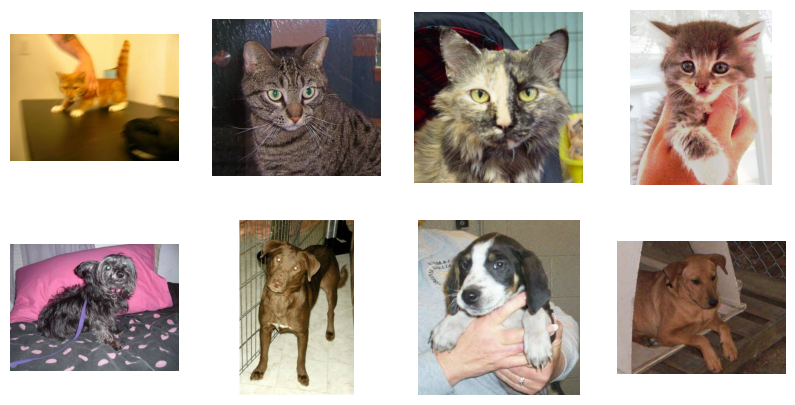

In [11]:
# ---------------------
# Display Sample Images
# ---------------------

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get first 4 cats and 4 dogs
cat_images = [f for f in os.listdir(train_path) if "cat" in f][:4]
dog_images = [f for f in os.listdir(train_path) if "dog" in f][:4]

plt.figure(figsize=(10,5))

for i, img_name in enumerate(cat_images + dog_images):
    plt.subplot(2,4,i+1)
    img_path = os.path.join(train_path, img_name)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
# -----------------
# Check Image Sizes
# -----------------

from PIL import Image

for img_name in (cat_images + dog_images):
    img_path = os.path.join(train_path, img_name)
    img = Image.open(img_path)
    print(f"{img_name}: {img.size}")

In [22]:
# ===================================
# Phase 3 : Building Your First Model
# ===================================

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

'''
 Note
------
Conv2D : looks for patterns (edges, fur, shapes)
MaxPooling : reduces image size, keeps important info
Flatten : prepares data for output
Dense layers : final decision
Sigmoid : output = 0 or 1 (cat or dog)
'''

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

'\n Note\n------\nConv2D : looks for patterns (edges, fur, shapes)\nMaxPooling : reduces image size, keeps important info\nFlatten : prepares data for output\nDense layers : final decision\nSigmoid : output = 0 or 1 (cat or dog)\n'

In [ ]:
# ===============================================
# Phase 4 : DATA PREPARATION (ImageDataGenerator)
# ===============================================

'''
Goal : Convert your image folders into batches the model can read.
'''

In [24]:
# -----------------------------------------------------
# STEP 1 : Automatically sort images into class folders
# -----------------------------------------------------

import os
import shutil

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Create class folders if not exist
os.makedirs(f"{train_path}/cats", exist_ok=True)
os.makedirs(f"{train_path}/dogs", exist_ok=True)

# Move only files, ignore directories
for filename in os.listdir(train_path):
    src = os.path.join(train_path, filename)

    # Skip folders
    if os.path.isdir(src):
        continue

    if filename.startswith("cat"):
        shutil.move(src, os.path.join(train_path, "cats", filename))
    elif filename.startswith("dog"):
        shutil.move(src, os.path.join(train_path, "dogs", filename))

print("All images sorted into cats/ and dogs/ folders!")

All images sorted into cats/ and dogs/ folders!


In [ ]:
# -----------------------
# Remove the extra images
# -----------------------

import os

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Delete any images directly under train/ (not in subfolders)
for filename in os.listdir(train_path):
    file_path = os.path.join(train_path, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)

print("✔ Extra images removed from train folder")
print("Current contents:", os.listdir(train_path))

In [ ]:
# -------------
# Verifications
# -------------

import os

# check  :

data_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data"
print(os.listdir(data_path))

# check dogs and cats counts :

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

print("Contents of train folder:", os.listdir(train_path))
print("Number of cats:", len(os.listdir(os.path.join(train_path, "cats"))))
print("Number of dogs:", len(os.listdir(os.path.join(train_path, "dogs"))))

In [ ]:
# ----------------------------------------------
# STEP 2 : Prepare train & validation generators
# ----------------------------------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Data augmentation + rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,          # scale pixel values 0-255 -> 0-1
    rotation_range=20,       # rotate images
    width_shift_range=0.2,   # shift horizontally
    height_shift_range=0.2,  # shift vertically
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # flip images
    validation_split=0.2     # 20% for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)



In [25]:
# -----------------------
# Remove the extra images
# -----------------------

import os

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Delete any images directly under train/ (not in subfolders)
for filename in os.listdir(train_path):
    file_path = os.path.join(train_path, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)

print("✔ Extra images removed from train folder")
print("Current contents:", os.listdir(train_path))

✔ Extra images removed from train folder
Current contents: ['cats', 'dogs']


In [26]:
# Verifications
# -------------

import os

# check  :

data_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data"
print(os.listdir(data_path))

# check dogs and cats counts :

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

print("Contents of train folder:", os.listdir(train_path))
print("Number of cats:", len(os.listdir(os.path.join(train_path, "cats"))))
print("Number of dogs:", len(os.listdir(os.path.join(train_path, "dogs"))))

['test1.zip', 'train.zip', 'test', 'train']
Contents of train folder: ['cats', 'dogs']
Number of cats: 12500
Number of dogs: 12500


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/train"

# Data augmentation + rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,          # scale pixel values 0-255 -> 0-1
    rotation_range=20,       # rotate images
    width_shift_range=0.2,   # shift horizontally
    height_shift_range=0.2,  # shift vertically
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # flip images
    validation_split=0.2     # 20% for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # smaller images -> faster
    batch_size=16,           # smaller batch -> fits GPU memory
    class_mode="binary",
    subset="training"
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # match training size
    batch_size=16,
    class_mode="binary",
    subset="validation"
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [28]:
# ==========================
# Phase 5 : Training the CNN
# ==========================

'''
Note : We already built our CNN in Phase 3. Now we will compile it and train using the generators from Phase 4.
'''

'\nNote : We already built our CNN in Phase 3. Now we will compile it and train using the generators from Phase 4.\n'

In [37]:
# -----------------
# Step 1 : Compile the Model
# -----------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
# -----------------------------------------------------
# Step 2 : Prepare checkpoint to save best model during training
# -----------------------------------------------------

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5"

# Save only the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [39]:
# ------------------------
# Step 3 : Train the model
# ------------------------

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5737 - loss: 0.6987
Epoch 1: val_accuracy improved from -inf to 0.66446, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 220s 172ms/step - accuracy: 0.5737 - loss: 0.6987 - val_accuracy: 0.6645 - val_loss: 0.6100
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6659 - loss: 0.6102
Epoch 2: val_accuracy improved from 0.66446 to 0.68970, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 214s 171ms/step - accuracy: 0.6659 - loss: 0.6102 - val_accuracy: 0.6897 - val_loss: 0.5899
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6912 - loss: 0.5829
Epoch 3: val_accuracy improved from 0.68970 to 0.70633, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 165ms/step - accuracy: 0.6912 - loss: 0.5829 - val_accuracy: 0.7063 - val_loss: 0.5859
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7129 - loss: 0.5527
Epoch 4: val_accuracy improved from 0.70633 to 0.73758, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 168ms/step - accuracy: 0.7129 - loss: 0.5527 - val_accuracy: 0.7376 - val_loss: 0.5274
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7374 - loss: 0.5267
Epoch 5: val_accuracy improved from 0.73758 to 0.74379, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 169ms/step - accuracy: 0.7374 - loss: 0.5267 - val_accuracy: 0.7438 - val_loss: 0.5201
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7486 - loss: 0.5086
Epoch 6: val_accuracy improved from 0.74379 to 0.75962, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 213s 170ms/step - accuracy: 0.7486 - loss: 0.5086 - val_accuracy: 0.7596 - val_loss: 0.5155
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7535 - loss: 0.5084
Epoch 7: val_accuracy did not improve from 0.75962
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 215s 172ms/step - accuracy: 0.7535 - loss: 0.5084 - val_accuracy: 0.7256 - val_loss: 0.5460
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7526 - loss: 0.4941
Epoch 8: val_accuracy improved from 0.75962 to 0.76382, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 167ms/step - accuracy: 0.7526 - loss: 0.4941 - val_accuracy: 0.7638 - val_loss: 0.4843
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7635 - loss: 0.4878
Epoch 9: val_accuracy improved from 0.76382 to 0.76502, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 169ms/step - accuracy: 0.7635 - loss: 0.4878 - val_accuracy: 0.7650 - val_loss: 0.4913
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7676 - loss: 0.4739
Epoch 10: val_accuracy improved from 0.76502 to 0.77584, saving model to /content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 210s 168ms/step - accuracy: 0.7676 - loss: 0.4739 - val_accuracy: 0.7758 - val_loss: 0.4687


In [40]:
# ==========================================
# Phase 06 : Model Evaluation and Prediction
# ==========================================

In [42]:
# -----------------------------
# Step 01 : Load the best model
# -----------------------------

from tensorflow.keras.models import load_model

best_model_path = "/content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5"
model = load_model(best_model_path)


In [43]:
 # ----------------------------
 # Step 02 : Evaluate the model
 # ----------------------------

val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.7842 - loss: 0.4703
Validation Accuracy: 0.7775999903678894


In [44]:
# ----------------------------
# Step 03 : Evaluate the model
# ----------------------------

import numpy as np
from tensorflow.keras.preprocessing import image
import os

test_path = "/content/drive/MyDrive/dog_vs_cat_classifier/data/test"
test_images = sorted(os.listdir(test_path))

for img_name in test_images[:5]:  # first 5 images as example
    img_path = os.path.join(test_path, img_name)
    img = image.load_img(img_path, target_size=(128,128))
    x = image.img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)
    print(img_name, "→", "Dog" if pred[0][0]>0.5 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1.jpg → Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
10.jpg → Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
100.jpg → Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1000.jpg → Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
10000.jpg → Dog


In [48]:
# app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# -------------------------
# Load the trained model
# -------------------------
best_model_path = "/content/drive/MyDrive/dog_vs_cat_classifier/model/dog_cat_model_best.h5"  # update if your path is different
model = load_model(best_model_path)

st.title("Cat vs Dog Image Classifier 🐱🐶")
st.write("Upload an image and the model will predict whether it's a Cat or Dog.")

# -------------------------
# Image uploader
# -------------------------
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Open image
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))  # same size as training
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    # Prediction
    pred = model.predict(x)
    label = "Dog 🐶" if pred[0][0] > 0.5 else "Cat 🐱"

    st.success(f"Prediction: {label}")


2025-12-04 06:59:19.645 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.715 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-04 06:59:19.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 06:59:19.719 Thread 'MainThread': mi

In [46]:
pip install streamlit tensorflow pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.7 MB/s eta 0:00:00


In [49]:
# -------
# Run App
# -------

streamlit run app.py

SyntaxError: invalid syntax (ipython-input-1629577057.py, line 5)